In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [24]:
import numpy as np
# mcv, hb, gender, EDA

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
data = pd.read_csv('/content/drive/MyDrive/Alpha/MCH1.csv')
data

,Age,Gender,MCH,phenotype
0,19,m,27.4,Silent Carrier
1,29,f,27.6,Silent Carrier
2,29,f,29.5,Silent Carrier
3,47,f,28.3,Silent Carrier
4,9,m,28.6,Silent Carrier
...,...,...,...,...
404,65,m,NaN,NaN
405,9,f,NaN,NaN
406,9,f,NaN,NaN
407,2,m,NaN,NaN


# **EDA**

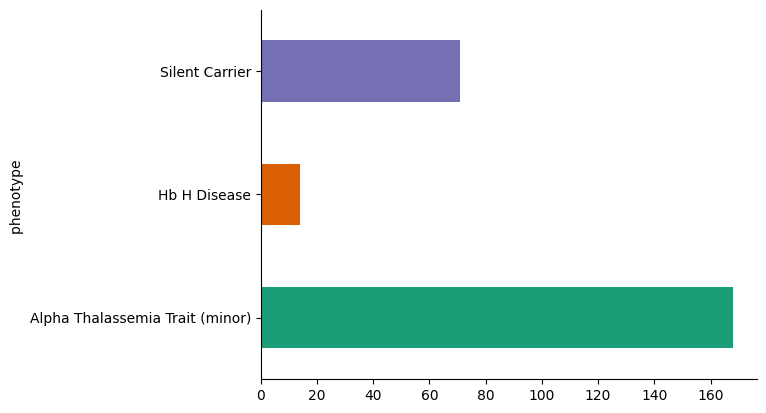

In [27]:

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('phenotype ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

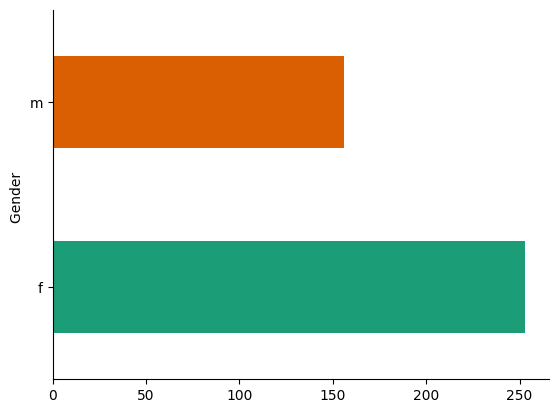

In [28]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Gender ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

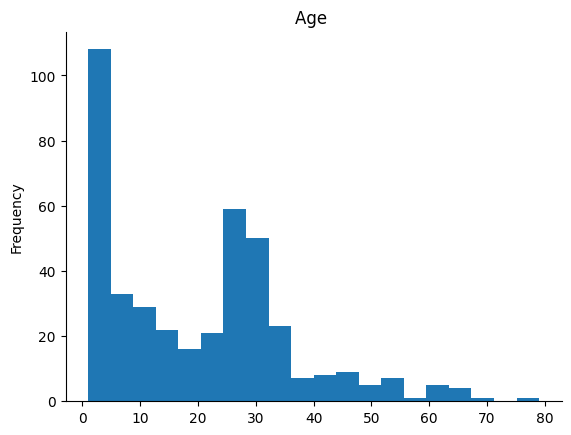

In [29]:

from matplotlib import pyplot as plt
data['Age '].plot(kind='hist', bins=20, title='Age ')
plt.gca().spines[['top', 'right',]].set_visible(False)

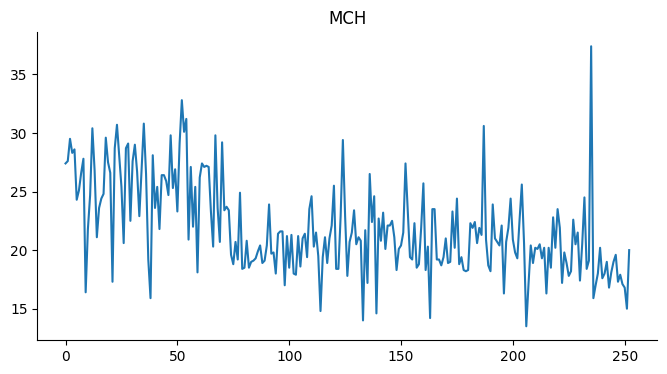

In [30]:

from matplotlib import pyplot as plt
data['MCH'].plot(kind='line', figsize=(8, 4), title='MCH')
plt.gca().spines[['top', 'right']].set_visible(False)

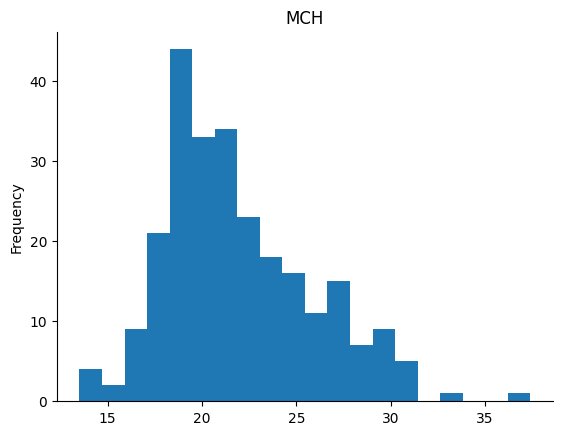

In [31]:

from matplotlib import pyplot as plt
data['MCH'].plot(kind='hist', bins=20, title='MCH')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [32]:
print(data.head())

print(data.info())

print(data.isnull().sum())


   Age  Gender    MCH      phenotype 
0    19       m  27.4  Silent Carrier
1    29       f  27.6  Silent Carrier
2    29       f  29.5  Silent Carrier
3    47       f  28.3  Silent Carrier
4     9       m  28.6  Silent Carrier
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         409 non-null    int64  
 1   Gender      409 non-null    object 
 2   MCH         253 non-null    float64
 3   phenotype   253 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 12.9+ KB
None
Age             0
Gender          0
MCH           156
phenotype     156
dtype: int64


In [40]:
# Missing values
print(data.isnull().sum())

Age             0
Gender          0
MCH           156
phenotype       0
dtype: int64


In [41]:
missing_percentage = (data['MCH'].isnull().sum() / len(data)) * 100
print(f'Missing percentage in MCH: {missing_percentage:.2f}%')

Missing percentage in MCH: 38.14%


In [42]:
data.dropna(subset=['MCH'], inplace=True)

In [44]:
print(data.describe())

             Age          MCH  phenotype 
count  253.000000  253.000000  253.000000
mean    20.015810   21.902372    0.616601
std     16.016353    3.937447    0.894894
min      1.000000   13.500000    0.000000
25%      4.000000   19.000000    0.000000
50%     21.000000   21.000000    0.000000
75%     29.000000   24.400000    2.000000
max     79.000000   37.400000    2.000000


In [45]:
# Missing values
print(data.isnull().sum())

Age           0
Gender        0
MCH           0
phenotype     0
dtype: int64


In [49]:
le = LabelEncoder()
data['phenotype '] = le.fit_transform(data['phenotype '])

In [50]:
X = data[['MCH']]
y = data['phenotype ']

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.25, random_state= 0)

INFO  ABOUT DATA

In [52]:
print("X_train:")
print(X_train)
print(X_train.info())

print("\nX_test:")
print(X_test)
print(X_test.info())

print("\ny_train:")
print(y_train)
print(y_train.info())

print("\ny_test info:")
print(y_test)
print(y_test.info())


X_train:
      MCH
219  20.2
246  19.6
33   22.9
108  19.4
156  22.3
..    ...
67   29.8
192  21.0
117  18.9
47   29.8
172  19.0

[189 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 219 to 172
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MCH     189 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB
None

X_test:
      MCH
158  18.8
83   19.0
170  21.0
101  21.3
150  20.4
..    ...
15   23.6
152  27.4
74   19.6
7    26.6
89   19.1

[64 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 158 to 89
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MCH     64 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB
None

y_train:
219    0
246    1
33     2
108    0
156    0
      ..
67     2
192    0
117    0
47     2
172    0
Name: phenotype , Length: 189, dtype: int64
<class 'pandas.core.series.Ser

In [53]:

print(X_train,X_test, y_train,y_test.info())


<class 'pandas.core.series.Series'>
Index: 64 entries, 158 to 89
Series name: phenotype 
Non-Null Count  Dtype
--------------  -----
64 non-null     int64
dtypes: int64(1)
memory usage: 1.0 KB
      MCH
219  20.2
246  19.6
33   22.9
108  19.4
156  22.3
..    ...
67   29.8
192  21.0
117  18.9
47   29.8
172  19.0

[189 rows x 1 columns]       MCH
158  18.8
83   19.0
170  21.0
101  21.3
150  20.4
..    ...
15   23.6
152  27.4
74   19.6
7    26.6
89   19.1

[64 rows x 1 columns] 219    0
246    1
33     2
108    0
156    0
      ..
67     2
192    0
117    0
47     2
172    0
Name: phenotype , Length: 189, dtype: int64 None


In [54]:
# بناء وتدريب نموذج الانحدار اللوجستي
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [55]:
# التنبؤ ببيانات الاختبار
y_pred = model.predict(X_test)

In [56]:
print (y_pred)

[0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 2 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 2 0 2 0]


In [60]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

target_names = [str(label) for label in le.classes_]

print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))


Accuracy: 0.765625
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        47
           1       0.00      0.00      0.00         3
           2       0.56      0.64      0.60        14

    accuracy                           0.77        64
   macro avg       0.47      0.50      0.48        64
weighted avg       0.74      0.77      0.75        64



In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[40  0  7]
 [ 3  0  0]
 [ 5  0  9]]


0.765625

SVM

In [62]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [63]:
# Check the sample size of each set
print("Training set size (X_train):", X_train.shape[0])
print("Test set size (X_test):", X_test.shape[0])
print("Training set size (y_train):", y_train.shape[0])
print("Test set size (y_test):", y_test.shape[0])

# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)



Training set size (X_train): 189
Test set size (X_test): 64
Training set size (y_train): 189
Test set size (y_test): 64


SVC(kernel='linear')

In [64]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Alternative way if the decode (label encoder) doesn't work.

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to your training labels (assuming 'y' is your target variable)
# Replace 'y' with the actual name of your target variable column
label_encoder.fit(y_train)

# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Decode the predicted labels back to their original categories
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the decoded predictions
print(y_pred_decoded)


              precision    recall  f1-score   support

           0       0.85      0.85      0.85        47
           1       0.00      0.00      0.00         3
           2       0.59      0.71      0.65        14

    accuracy                           0.78        64
   macro avg       0.48      0.52      0.50        64
weighted avg       0.75      0.78      0.77        64

Accuracy: 0.78125
[0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 2 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0
 2 2 0 0 2 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 2 0 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Decode the predicted labels back to their original categories
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the decoded predictions
print(y_pred_decoded)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        47
           1       0.00      0.00      0.00         3
           2       0.59      0.71      0.65        14

    accuracy                           0.78        64
   macro avg       0.48      0.52      0.50        64
weighted avg       0.75      0.78      0.77        64

Accuracy: 0.78125
[0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 2 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0
 2 2 0 0 2 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 2 0 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[40  0  7]
 [ 3  0  0]
 [ 4  0 10]]


0.78125

**Decision Tree**

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [71]:
# Create a Decision Tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Convert target names to string
target_names = [str(label) for label in le.classes_]

# Print classification report with corrected target names
print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))


Accuracy: 0.6875
              precision    recall  f1-score   support

           0       0.85      0.74      0.80        47
           1       0.00      0.00      0.00         3
           2       0.45      0.64      0.53        14

    accuracy                           0.69        64
   macro avg       0.43      0.46      0.44        64
weighted avg       0.73      0.69      0.70        64



In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[35  2 10]
 [ 2  0  1]
 [ 4  1  9]]


0.6875

Random Forest

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [74]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


In [75]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Convert target names to strings
target_names = [str(label) for label in le.classes_]

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))


Accuracy: 0.6875
              precision    recall  f1-score   support

           0       0.85      0.74      0.80        47
           1       0.00      0.00      0.00         3
           2       0.45      0.64      0.53        14

    accuracy                           0.69        64
   macro avg       0.43      0.46      0.44        64
weighted avg       0.73      0.69      0.70        64



In [ ]:
xgboost, lightgbm

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[35  2 10]
 [ 2  0  1]
 [ 4  1  9]]


0.6875

**xgboost**

In [84]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [85]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Create and train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

target_names = [str(label) for label in le.classes_]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

Accuracy: 0.71875
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        47
           1       0.00      0.00      0.00         3
           2       0.50      0.64      0.56        14

    accuracy                           0.72        64
   macro avg       0.45      0.48      0.46        64
weighted avg       0.74      0.72      0.73        64



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:44:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**lightgbm**

In [86]:
import lightgbm as lgb

# Create and train the LightGBM model
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

target_names = [str(label) for label in le.classes_]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 56
[LightGBM] [Info] Number of data points in the train set: 189, number of used features: 1
[LightGBM] [Info] Start training from score -0.445956
[LightGBM] [Info] Start training from score -2.843852
[LightGBM] [Info] Start training from score -1.198696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth